In [1]:
import pandas as pd
all = pd.read_csv('allData.csv')

C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\1614618486.py:2: DtypeWarning: Columns (1,3,4,7,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  all = pd.read_csv('allData.csv')


C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\4113644374.py:7: DtypeWarning: Columns (1,3,4,7,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('allData.csv')


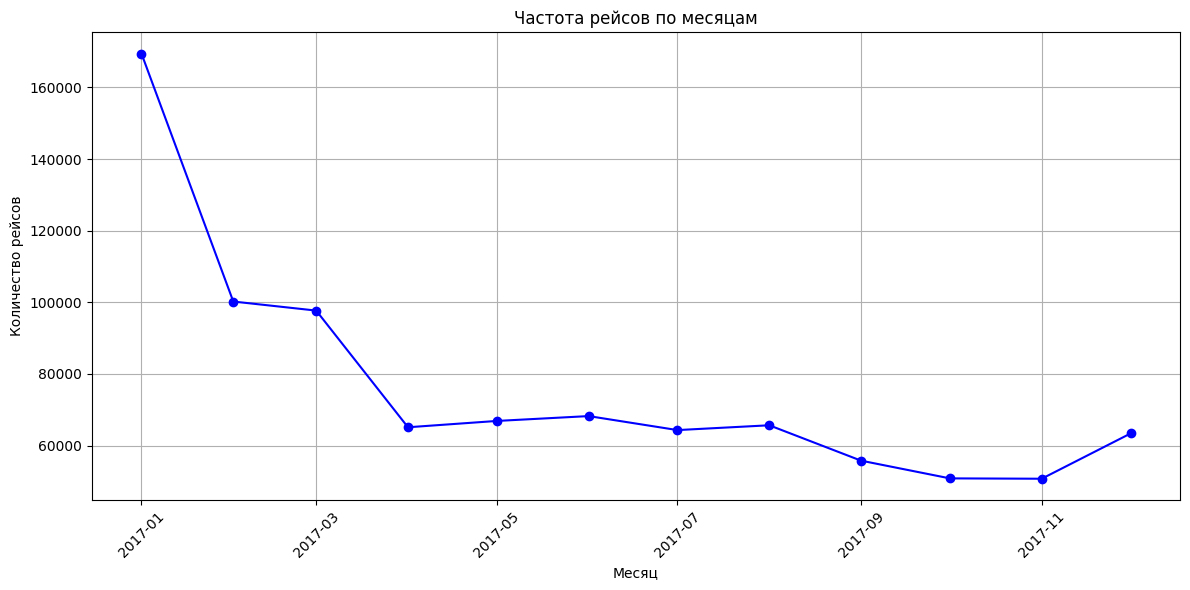

In [5]:
# Частота рейсов по месяцам

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('allData.csv')

df['DepartDateTime'] = pd.to_datetime(df['DepartDateTime'], errors='coerce')

df['Month'] = df['DepartDateTime'].dt.to_period('M')
monthly_flights = df.groupby('Month').size().reset_index(name='Flight Count')

monthly_flights['Month'] = monthly_flights['Month'].dt.to_timestamp()

monthly_flights = monthly_flights.iloc[:-1]

plt.figure(figsize=(12, 6))
plt.plot(monthly_flights['Month'], monthly_flights['Flight Count'], marker='o', linestyle='-', color='b')
plt.title('Частота рейсов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\412206283.py:4: DtypeWarning: Columns (1,3,4,7,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('allData.csv')


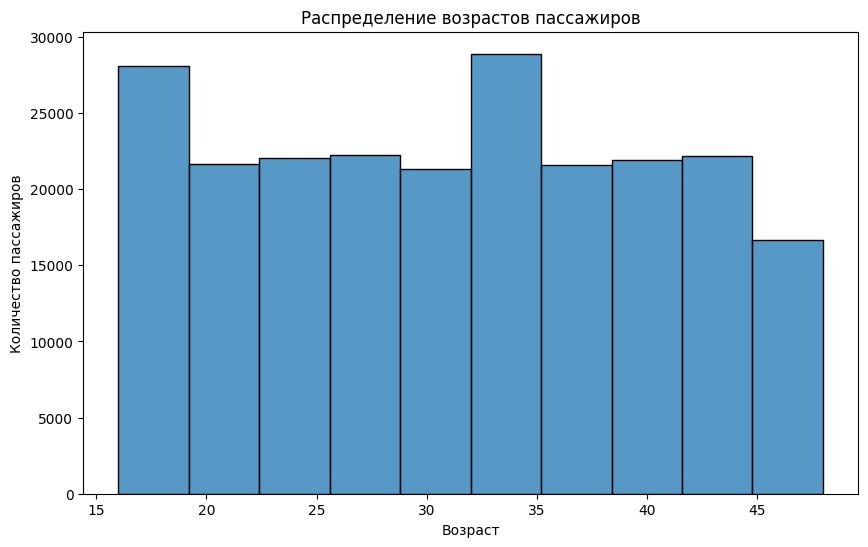

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('allData.csv')

df['DepartDateTime'] = pd.to_datetime(df['DepartDateTime'], format='mixed', errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['PaxAge'], bins=10)
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\1985567274.py:5: DtypeWarning: Columns (1,3,4,7,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('allData.csv')


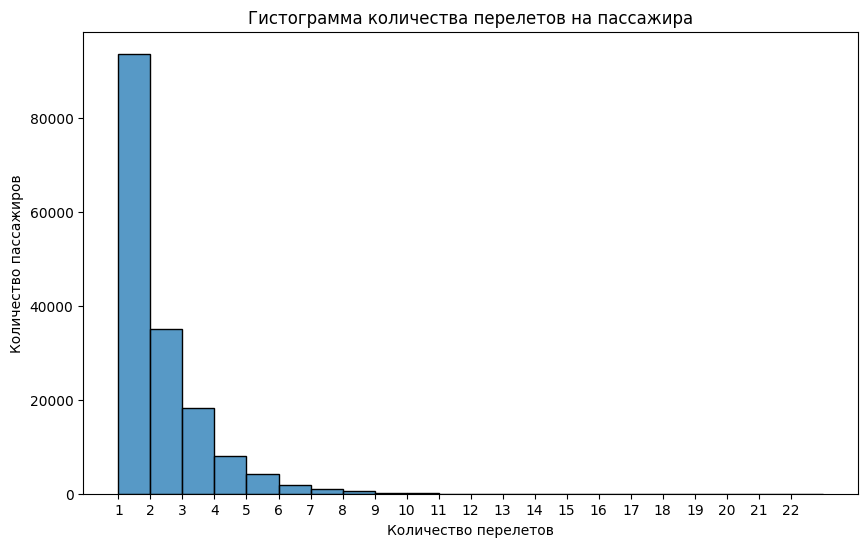

Количество перелетов на пассажира:
1.8314769381746812


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('allData.csv')

flight_counts = df.groupby(['First Name', 'Second Name', 'Last Name']).size().reset_index(name='FlightCount')

plt.figure(figsize=(10, 6))
sns.histplot(flight_counts['FlightCount'], bins=range(1, flight_counts['FlightCount'].max() + 2), kde=False)
plt.title('Гистограмма количества перелетов на пассажира')
plt.xlabel('Количество перелетов')
plt.ylabel('Количество пассажиров')
plt.xticks(range(1, flight_counts['FlightCount'].max() + 1))
plt.show()

print("Количество перелетов на пассажира:")
print(flight_counts['FlightCount'].mean())

C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\2139569030.py:5: DtypeWarning: Columns (1,3,4,7,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('allData.csv')
C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\2139569030.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_destinations.index[:10], y=popular_destinations.values[:10], palette='viridis')


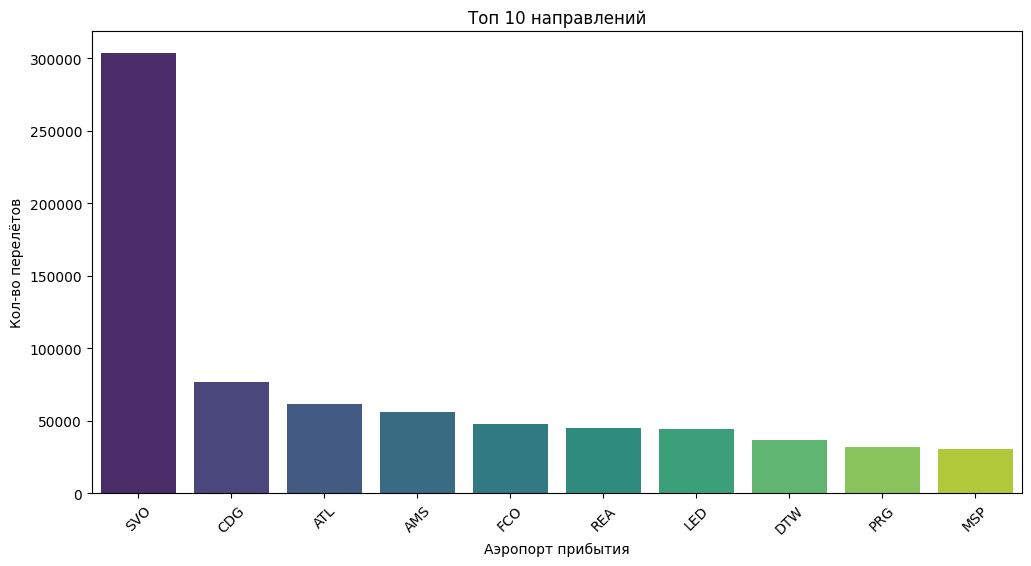

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('allData.csv')

data.ffill(inplace=True)

data['Dest'] = data['Dest'].str.upper()

popular_destinations = data['Dest'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_destinations.index[:10], y=popular_destinations.values[:10], palette='viridis')
plt.title('Топ 10 направлений')
plt.xlabel('Аэропорт прибытия')
plt.ylabel('Кол-во перелётов')
plt.xticks(rotation=45)
plt.show()

In [14]:
flights_number = all.groupby(['TravelDoc','First Name', 'Last Name']).size().reset_index(name='FlightCount')
flights_number[flights_number["FlightCount"] > 20]

,TravelDoc,First Name,Last Name,FlightCount
72635,5293 500602,KARINA,NAUMOVA,23


In [20]:
karina_naumova = all[(all["First Name"] == "KARINA") & (all["TravelDoc"] == "5293 500602") & (all["Last Name"] == "NAUMOVA")].sort_values(by=['DepartDateTime']).drop_duplicates(subset=['Flight']).reset_index(drop=True)
karina_naumova

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
0,KARINA,V.,NAUMOVA,5293 500602,ADXPMC,4.331297e+15,SU5612,Magadan,2017-01-25 10:55:00,1989-01-15,28.0,NaN,NaN,NaN,NaN
1,KARINA,VLADISLAVOVNA,NAUMOVA,5293 500602,DVPQQJ,2.562475e+15,SU5613,NaN,2017-02-19 15:50:00,1989-01-15,28.0,GDX,KHV,2017-02-19 17:30:00,NaN
2,KARINA,VLADISLAVOVNA,NAUMOVA,5293 500602,NaN,NaN,SU4606,Okha,2017-03-15 13:50:00,1989-01-15,28.0,NaN,NaN,NaN,NaN
3,KARINA,VLADISLAVOVNA,NAUMOVA,5293 500602,NaN,NaN,SU4605,Okha,2017-03-25 14:20:00,1989-01-15,28.0,NaN,NaN,NaN,NaN
4,KARINA,V.,NAUMOVA,5293 500602,JOQAOT,8.414540e+15,SU5624,Yuzhno,2017-04-15 20:20:00,1989-01-15,28.0,NaN,NaN,NaN,NaN
5,KARINA,VLADISLAVOVNA,NAUMOVA,5293 500602,NaN,7.317178e+15,SU5621,Khabarovsk,2017-06-12 08:05:00,1989-01-15,28.0,NaN,NaN,NaN,NaN
6,KARINA,V.,NAUMOVA,5293 500602,NaN,8.481735e+15,SU4599,Nogliki,2017-06-22 09:00:00,1989-01-15,28.0,NaN,NaN,NaN,NaN
7,KARINA,VLADISLAVOVNA,NAUMOVA,5293 500602,JQCEUV,1.965595e+15,SU4600,NaN,2017-06-25 13:05:00,1989-01-15,28.0,NGK,KHV,2017-06-25 14:15:00,NaN
8,KARINA,VLADISLAVOVNA,NAUMOVA,5293 500602,UWSVYO,4.265644e+15,SU5684,NaN,2017-06-30 10:30:00,NaN,NaN,KHV,PKC,2017-06-30 15:15:00,NaN
9,KARINA,V.,NAUMOVA,5293 500602,NaN,NaN,SU5615,Vladivostok,2017-07-09 14:05:00,1989-01-15,28.0,NaN,NaN,NaN,NaN


In [49]:
import numpy as np
karina_naumova = karina_naumova.replace({np.nan: None})

In [56]:
dest = karina_naumova['Destination'].tolist()
dest_air = karina_naumova['Dest'].tolist()
destinations = []
for dest, air in zip(dest, dest_air):
    if dest != None:
        destinations.append(dest)
    else:
        destinations.append(air)

destinations = list(map(lambda x: x.replace('KHV', 'Khabarovsk'), destinations))
destinations = list(map(lambda x: x.replace('UUS', 'Yuzhno'), destinations))
destinations = list(map(lambda x: x.replace('VVO', 'Vladivostok'), destinations))
destinations = list(map(lambda x: x.replace('PKC', 'Petropavlovsk'), destinations))

date = karina_naumova['DepartDateTime']

In [59]:
import pandas as pd

df1 = pd.DataFrame({"Dest" : destinations})
df2 = pd.DataFrame({"Date" : date})

pd.concat([df1, df2], axis=1)

,Dest,Date
0,Magadan,2017-01-25 10:55:00
1,Khabarovsk,2017-02-19 15:50:00
2,Okha,2017-03-15 13:50:00
3,Okha,2017-03-25 14:20:00
4,Yuzhno,2017-04-15 20:20:00
5,Khabarovsk,2017-06-12 08:05:00
6,Nogliki,2017-06-22 09:00:00
7,Khabarovsk,2017-06-25 13:05:00
8,Petropavlovsk,2017-06-30 10:30:00
9,Vladivostok,2017-07-09 14:05:00


In [28]:
import matplotlib.pyplot as plt

karina_naumova["Month"] = karina_naumova["DepartDateTime"].astype("datetime64[ns]").dt.month
freq_flights = karina_naumova.groupby("Month").size().reset_index(name='FlightCount')
freq_flights


,Month,FlightCount
0,1,1
1,2,1
2,3,2
3,4,1
4,6,4
5,7,2
6,8,1
7,10,2
8,11,1
9,12,1


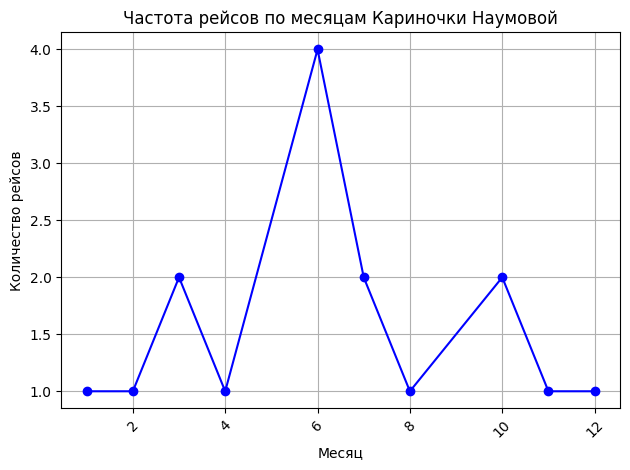

In [31]:
plt.plot(freq_flights['Month'], freq_flights['FlightCount'], marker='o', linestyle='-', color='b')
plt.title('Частота рейсов по месяцам Кариночки Наумовой')
plt.xlabel('Месяц')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
passports_number = flights_number.groupby('TravelDoc').size().reset_index(name='PassportCount')
passports_number[passports_number["PassportCount"] > 2]["TravelDoc"]

84077    8248 013778
Name: TravelDoc, dtype: object

In [36]:
all[all['TravelDoc'] == '8248 013778'].drop_duplicates(subset=['Flight', 'e-Ticket']).sort_values(by='DepartDateTime').drop(['Code', 'e-Ticket'], axis=1)

,First Name,Second Name,Last Name,TravelDoc,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
110513,RAMIL,ALBERTOVICH,BUROV,8248 013778,SU1273,Moscow,2017-01-03 11:15:00,1995-08-24,21.0,NaN,NaN,NaN,NaN
53289,GORDEI,M.,GLEBOV,8248 013778,SU1057,Moscow,2017-01-16 01:45:00,1982-12-31,34.0,NaN,NaN,NaN,NaN
53288,GORDEI,M.,GLEBOV,8248 013778,SU1276,Kazan,2017-03-09 07:15:00,1982-12-31,34.0,NaN,NaN,NaN,NaN
53315,GORDEI,MAKAREVICH,GLEBOV,8248 013778,SU1281,Moscow,2017-03-10 14:15:00,1982-12-31,34.0,NaN,NaN,NaN,NaN


In [71]:
suspicious = all.groupby(['First Name', 'Last Name', 'Flight', 'TravelDoc', 'DepartDateTime']).size().reset_index(name='PacCount')
suspicious = suspicious.groupby(['First Name', 'Last Name', 'Flight', 'DepartDateTime']).size().reset_index(name='DocCount')
suspicious[suspicious['DocCount'] > 1]

,First Name,Last Name,Flight,DepartDateTime,DocCount
1364,ADEL',VASIL'EV,SU6290,2017-01-01 14:30:00,2
1435,ADELINA,AGEEVA,SU4606,2017-09-06 13:50:00,2
1495,ADELINA,BASOVA,SU5602,2017-02-15 16:35:00,2
1549,ADELINA,BULATOVA,SU1168,2017-01-30 18:10:00,2
1632,ADELINA,DOROFEEVA,SU1184,2017-02-02 01:50:00,2
...,...,...,...,...,...
283092,ZLATA,SOKOLOVA,SU5618,2017-07-05 05:40:00,2
283180,ZLATA,TIMOFEEVA,SU4130,2017-02-25 07:05:00,2
283227,ZLATA,UVAROVA,SU1181,2017-04-11 03:10:00,2
283237,ZLATA,VAVILOVA,SU1323,2017-02-15 02:15:00,2


In [74]:
all[(all["First Name"] == "ADELINA") & (all["Last Name"] == "BULATOVA") & (all["Flight"] == "SU1168")].sort_values(by=['DepartDateTime']).drop_duplicates().reset_index(drop=True).dropna(subset=['TravelDoc'])


,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
1,ADELINA,I.,BULATOVA,0127 981224,RJBNVW,5.785966e+15,SU1168,Rostov,2017-01-30 18:10:00,1983-09-19,33.0,NaN,NaN,NaN,NaN
2,ADELINA,IL'INIChNA,BULATOVA,45 8828661,RJBNVW,5.785966e+15,SU1168,NaN,2017-01-30 18:10:00,NaN,NaN,SVO,ROV,2017-01-30 20:10:00,NaN


In [79]:
by_flights = all.groupby(['Flight']).size().reset_index(name='PaxCount')
by_flights.sort_values(by=['PaxCount'])

,Flight,PaxCount
10356,DL3979,1
2327,AM3014,1
11880,DL5595,1
2324,AM3005,1
11867,DL5582,2
...,...,...
20905,SU1479,5670
20899,SU1465,5816
21525,SU4602,5922
21523,SU4600,7040


In [87]:
all[all['Flight'] == 'DL3979'].dropna(axis=1)

,First Name,Last Name,Flight,DepartDateTime,From,Dest
1852348,DMITRIY,SOROKIN,DL3979,2017-04-22,BOI,SEA


In [86]:
all[(all["First Name"] == "DMITRIY") & (all["Last Name"] == "SOROKIN")].sort_values(by=['DepartDateTime']).reset_index(drop=True).dropna(axis=1)

,First Name,Last Name,Flight,DepartDateTime,From,Dest
0,DMITRIY,SOROKIN,SU1367,2017-01-05,STW,SVO
1,DMITRIY,SOROKIN,CZ7207,2017-01-06,SVO,ATH
2,DMITRIY,SOROKIN,KL1572,2017-01-08,ATH,AMS
3,DMITRIY,SOROKIN,KL685,2017-01-18,AMS,MEX
4,DMITRIY,SOROKIN,AM228,2017-01-26,MEX,GDL
5,DMITRIY,SOROKIN,DL9001,2017-04-01,GDL,SLC
6,DMITRIY,SOROKIN,DL4021,2017-04-12,SLC,BOI
7,DMITRIY,SOROKIN,DL3979,2017-04-22,BOI,SEA
8,DMITRIY,SOROKIN,DL5777,2017-05-02,SEA,MFR
9,DMITRIY,SOROKIN,DL5766,2017-06-26,MFR,SLC


In [81]:
all[all['Flight'] == 'AM3014']

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
2326078,VERONIKA,NaN,LIUBIMOVA,NaN,NaN,NaN,AM3014,NaN,2017-10-29,NaN,NaN,CZM,MSP,NaN,NaN


In [88]:
all[(all["First Name"] == "VERONIKA") & (all["Last Name"] == "LIUBIMOVA")].sort_values(by=['DepartDateTime']).reset_index(drop=True).dropna(axis=1)

,First Name,Last Name,Flight,DepartDateTime,From,Dest
0,VERONIKA,LIUBIMOVA,SU1479,2017-01-08,ABA,SVO
1,VERONIKA,LIUBIMOVA,SU2550,2017-01-19,SVO,AMS
2,VERONIKA,LIUBIMOVA,AF1693,2017-02-25,AMS,NTE
3,VERONIKA,LIUBIMOVA,AF5603,2017-03-19,NTE,TLS
4,VERONIKA,LIUBIMOVA,AF7035,2017-05-10,TLS,SXB
5,VERONIKA,LIUBIMOVA,DL5427,2017-05-13 08:20:00,JAX,LGA
6,VERONIKA,LIUBIMOVA,AF5416,2017-05-28,SXB,RNS
7,VERONIKA,LIUBIMOVA,AF1030,2017-06-07,RNS,AMS
8,VERONIKA,LIUBIMOVA,KL1533,2017-07-02,AMS,MME
9,VERONIKA,LIUBIMOVA,KL1538,2017-07-18,MME,AMS


In [82]:
all[all['Flight'] == 'DL5595']

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
1126678,KRISTINA,NaN,SPIRIDONOVA,NaN,NaN,NaN,DL5595,Atlanta GA,2017-07-12,NaN,NaN,SHV,ATL,NaN,Shreveport LA


In [83]:
all[all['Flight'] == 'AM3005']

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
2044914,VIACHESLAV,NaN,SAVITCKII,NaN,NaN,NaN,AM3005,NaN,2017-07-09,NaN,NaN,CZM,MSP,NaN,NaN


In [92]:
all[(all["Dest"] == "BOI")].sort_values(by=['DepartDateTime']).reset_index(drop=True)

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
0,GALINA,NaN,GAVRILOVA,NaN,NaN,NaN,DL3605,Boise ID,2017-02-02,NaN,NaN,LAX,BOI,NaN,Los Angeles CA
1,TAMERLAN,NaN,GLUSHKOV,NaN,NaN,NaN,DL4698,Boise ID,2017-02-08,NaN,NaN,SEA,BOI,NaN,Seattle WA
2,EVA,NaN,KOMISSAROVA,NaN,NaN,NaN,DL3946,NaN,2017-02-10,NaN,NaN,LAX,BOI,NaN,NaN
3,SABINA,NaN,ZVYAGINTSEVA,NaN,NaN,NaN,DL1274,Boise ID,2017-02-15,NaN,NaN,SLC,BOI,NaN,Salt Lake City UT
4,ALIYA,NaN,SERGEEVA,NaN,NaN,NaN,DL4804,NaN,2017-02-23,NaN,NaN,LAX,BOI,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,IGOR',NaN,ANDREEV,NaN,NaN,NaN,DL4509,Boise ID,2018-01-01,NaN,NaN,SLC,BOI,NaN,Salt Lake City UT
906,IGNAT,NaN,KALININ,NaN,NaN,NaN,DL3996,Boise ID,2018-01-01,NaN,NaN,MSP,BOI,NaN,Minneapolis/St Paul MN
907,ILIA,NaN,BAZHENOV,NaN,NaN,NaN,DL3671,NaN,2018-01-01,NaN,NaN,SEA,BOI,NaN,NaN
908,MARGARITA,NaN,ALESHINA,NaN,NaN,NaN,DL3671,NaN,2018-01-01,NaN,NaN,SEA,BOI,NaN,NaN


In [94]:
import pandas as pd

all_df = pd.read_csv('allData.csv')
# Шаг 1: Считаем количество полетов каждого пассажира
frequent_flyers = (
    all_df.groupby(['First Name', 'Last Name'])
    .size()
    .reset_index(name='FlightCount')
)

# Фильтруем пассажиров, у которых больше 10 полетов
frequent_flyers_10_plus = frequent_flyers[frequent_flyers['FlightCount'] > 1]

# Шаг 2: Считаем количество рейсов в каждый город (Destination)
city_flight_counts = all_df['Destination'].value_counts()

# Определяем "отдаленные города" (например, те, куда меньше 5 рейсов)
distant_cities = city_flight_counts[city_flight_counts < 30].index

# Шаг 3: Фильтруем общий DataFrame для поиска полетов в отдаленные города
flights_to_distant_cities = all_df[all_df['Destination'].isin(distant_cities)]

# Шаг 4: Находим пересечение пассажиров с более чем 10 полетами и полетами в отдаленные города
result = flights_to_distant_cities[
    flights_to_distant_cities.set_index(['First Name', 'Last Name']).index
    .isin(frequent_flyers_10_plus.set_index(['First Name', 'Last Name']).index)
]

# Выводим информацию о таких пассажирах
# Фильтруем пассажиров, у которых больше 10 полетов
result

C:\Users\Polina\AppData\Local\Temp\ipykernel_5148\2924591068.py:3: DtypeWarning: Columns (1,3,4,7,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('allData.csv')


,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
299051,VERA,NaN,SHUVALOVA,NaN,NaN,6.448300e+15,KE767,AOMORI,2017-02-19 10:30:00,NaN,NaN,REA,AOJ,NaN,SEOUL
299085,OSTROVSKAYA,NaN,VIKTORIYA,NaN,NaN,7.649165e+13,AF926,LIBREVILLE,2017-02-19 12:35:00,NaN,NaN,CDG,LBV,NaN,PARIS
299086,KORCHAGINA,NaN,ALIYA,NaN,NaN,9.022643e+15,AF926,LIBREVILLE,2017-02-19 12:35:00,NaN,NaN,CDG,LBV,NaN,PARIS
299328,KRUGLOVA,NaN,KAROLINA,NaN,NaN,9.251265e+15,AF514,ABUJA,2017-02-19 10:55:00,NaN,NaN,CDG,ABV,NaN,PARIS
300282,KOTOVA,NaN,DAR'YA,NaN,NaN,3.695726e+15,MU5824,SHANGRAO,2017-02-19 15:45:00,NaN,NaN,HRB,SQD,NaN,HARBIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569734,RAMIL',NaN,LAPTEV,NaN,NaN,NaN,DL561,Bermuda,2017-12-23,NaN,NaN,BOS,BDA,NaN,Boston MA
1570271,MIKHAIL,NaN,SVESHNIKOV,NaN,NaN,NaN,AM2330,Puebla,2017-03-26,NaN,NaN,MTY,PBC,NaN,Monterrey
1571462,NATAL'YA,NaN,TKACHEVA,NaN,NaN,NaN,KL1895,Graz,2017-08-25,NaN,NaN,AMS,GRZ,NaN,Amsterdam
1571878,ANTONINA,NaN,KORNEVA,NaN,NaN,NaN,CI9727,Chiang Rai,2017-10-29,NaN,NaN,BKK,CEI,NaN,Bangkok


In [95]:
# Приводим оба DataFrame к одинаковому индексу для удобства пересечения (по имени и фамилии)
result_indexed = result.set_index(['Flight'])
multiple_docs_indexed = all_df.set_index(['Flight'])

# Находим пересечение между двумя DataFrame на основе индексов
intersection = result_indexed[result_indexed.index.isin(multiple_docs_indexed.index)]

# Сбрасываем индекс для удобного вывода
intersection = intersection.reset_index()

# Выводим результат
intersection

,Flight,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
0,KE767,VERA,NaN,SHUVALOVA,NaN,NaN,6.448300e+15,AOMORI,2017-02-19 10:30:00,NaN,NaN,REA,AOJ,NaN,SEOUL
1,AF926,OSTROVSKAYA,NaN,VIKTORIYA,NaN,NaN,7.649165e+13,LIBREVILLE,2017-02-19 12:35:00,NaN,NaN,CDG,LBV,NaN,PARIS
2,AF926,KORCHAGINA,NaN,ALIYA,NaN,NaN,9.022643e+15,LIBREVILLE,2017-02-19 12:35:00,NaN,NaN,CDG,LBV,NaN,PARIS
3,AF514,KRUGLOVA,NaN,KAROLINA,NaN,NaN,9.251265e+15,ABUJA,2017-02-19 10:55:00,NaN,NaN,CDG,ABV,NaN,PARIS
4,MU5824,KOTOVA,NaN,DAR'YA,NaN,NaN,3.695726e+15,SHANGRAO,2017-02-19 15:45:00,NaN,NaN,HRB,SQD,NaN,HARBIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,DL561,RAMIL',NaN,LAPTEV,NaN,NaN,NaN,Bermuda,2017-12-23,NaN,NaN,BOS,BDA,NaN,Boston MA
6635,AM2330,MIKHAIL,NaN,SVESHNIKOV,NaN,NaN,NaN,Puebla,2017-03-26,NaN,NaN,MTY,PBC,NaN,Monterrey
6636,KL1895,NATAL'YA,NaN,TKACHEVA,NaN,NaN,NaN,Graz,2017-08-25,NaN,NaN,AMS,GRZ,NaN,Amsterdam
6637,CI9727,ANTONINA,NaN,KORNEVA,NaN,NaN,NaN,Chiang Rai,2017-10-29,NaN,NaN,BKK,CEI,NaN,Bangkok


In [96]:
flight_counts = (
    intersection.groupby(['First Name', 'Last Name'])
    .size()
    .reset_index(name='FlightCount')
)

flight_counts

,First Name,Last Name,FlightCount
0,ABRAMOV,BORIS,1
1,ABRAMOV,MAKSIM,1
2,ABRAMOV,RUSTAM,1
3,ABRAMOVA,NADEZHDA,1
4,ADEL,GORIACHEV,1
...,...,...,...
5886,ZVYAGINTSEVA,VIKTORIYA,1
5887,ZYKOV,DANIL,1
5888,ZYKOV,ELISEY,1
5889,ZYKOV,VITALIY,1


In [97]:
# Считаем количество полетов для каждого пассажира
flight_counts = all_df.groupby(['First Name', 'Second Name', 'Last Name']).size()

# Находим пассажиров, которые летают больше 3 раз
frequent_flyers = flight_counts[flight_counts > 2]

# Получаем информацию о таких пассажирах из исходного DataFrame
frequent_flyers_info = all_df[all_df.set_index(['First Name', 'Second Name', 'Last Name']).index.isin(frequent_flyers.index)]

frequent_flyers_info

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
30,ADEL,A.,ZVEREV,5753 679376,NaN,NaN,SU1702,Vladivostok,2017-01-15 19:45:00,1974-05-18,42.0,NaN,NaN,NaN,NaN
31,ADEL,A.,ZVEREV,5753 679376,PZLQSK,5.580851e+15,SU1427,Moscow,2017-01-09 22:45:00,1974-05-18,42.0,NaN,NaN,NaN,NaN
32,ADEL,A.,ZVEREV,5753 679376,NaN,NaN,SU5617,Vladivostok,2017-02-28 09:45:00,1974-05-18,42.0,NaN,NaN,NaN,NaN
33,ADEL,A.,ZVEREV,5753 679376,NaN,8.854899e+15,SU1258,Ufa,2017-03-15 15:00:00,1974-05-18,42.0,NaN,NaN,NaN,NaN
44,ADEL,ALBERTOVICH,CHESNOKOV,6526 580574,ROTLJT,7.561941e+15,SU1247,Moscow,2017-01-15 11:15:00,1988-03-20,28.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298594,DENIS,DMITRIEVICh,RUBTsOV,8270 941791,XIFCHF,5.179093e+14,SU1337,NaN,2017-01-08 21:10:00,1973-07-21,43.0,ARH,SVO,2017-01-08 23:00:00,NaN
298597,AMINA,AL'BERTOVNA,KOZLOVA,9782 322115,TFAQEG,5.852187e+15,SU1337,NaN,2017-01-08 21:10:00,NaN,NaN,ARH,SVO,2017-01-08 23:00:00,NaN
298599,MIROSLAV,SVJaTOSLAVOVICh,EMEL'JaNOV,3511 319326,JYYXED,4.714801e+15,SU1181,NaN,2017-02-14 03:10:00,NaN,NaN,VOG,SVO,2017-02-14 04:00:00,NaN
298600,ARTEMIJ,GERMANOVICh,TARASOV,2199 078129,XDKDZF,6.730366e+15,SU1181,NaN,2017-02-14 03:10:00,NaN,NaN,VOG,SVO,2017-02-14 04:00:00,NaN


In [98]:
# Группируем по имени, фамилии, отчеству и TravelDoc
grouped_flyers = frequent_flyers_info.groupby(['First Name', 'Second Name', 'Last Name', 'TravelDoc']).size().reset_index(name='Counts')

# Находим группы, где количество разных TravelDoc больше 1
duplicates_flyers = grouped_flyers.groupby(['First Name', 'Second Name', 'Last Name']).filter(lambda x: x['TravelDoc'].nunique() > 1)

# Извлекаем уникальные имена, фамилии и отчества
duplicate_passengers_flyers = frequent_flyers_info[frequent_flyers_info.set_index(['First Name', 'Second Name', 'Last Name', 'TravelDoc']).index.isin(duplicates_flyers.set_index(['First Name', 'Second Name', 'Last Name', 'TravelDoc']).index)]

# Выводим информацию о таких пассажирах
#duplicate_passengers_flyers[duplicate_passengers_flyers['Second Name'] == 'PLATONOVNA']

duplicate_passengers_flyers

,First Name,Second Name,Last Name,TravelDoc,Code,e-Ticket,Flight,Destination,DepartDateTime,PaxBirthDate,PaxAge,From,Dest,ArrivalDateTime,DepCity
264,ADEL,I.,GUBANOV,7510 205163,NaN,NaN,SU1547,Moscow,2017-06-26 11:35:00,1976-04-29,41.0,NaN,NaN,NaN,NaN
265,ADEL,I.,GUBANOV,7510 205163,VHBNVY,NaN,SU1142,Anapa,2017-01-19 13:45:00,1976-04-29,40.0,NaN,NaN,NaN,NaN
266,ADEL,I.,GUBANOV,7971 605786,NaN,4.252620e+15,SU1375,Moscow,2017-03-17 18:55:00,1984-12-28,32.0,NaN,NaN,NaN,NaN
267,ADEL,I.,GUBANOV,7510 205163,TCNXHE,4.906256e+15,SU1501,Moscow,2017-05-14 14:30:00,1976-04-29,41.0,NaN,NaN,NaN,NaN
831,ADELINA,DAMIROVNA,ZVEREVA,8205 069579,DTQOEZ,8.488797e+15,SU1642,Astrakhan,2017-02-07 08:40:00,1976-12-23,40.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298545,GEORGIJ,DMITRIEVICh,SOKOLOV,68 7189998,FTAJRC,3.284551e+15,SU5613,NaN,2017-02-05 15:50:00,1976-12-23,40.0,GDX,KHV,2017-02-05 17:30:00,NaN
298553,REGINA,JaROMIROVNA,ANDRIANOVA,8357 209426,LYWVJV,1.364488e+15,SU1603,NaN,2017-07-10 10:50:00,NaN,NaN,KUF,SVO,2017-07-10 11:40:00,NaN
298555,JaROMIR,DANILOVICh,KOZhEVNIKOV,1259 991615,VFBUDJ,9.216621e+15,SU5606,NaN,2017-01-05 12:30:00,1973-10-13,43.0,VVO,UUS,2017-01-05 15:15:00,NaN
298560,ALINA,TIHONOVNA,LAPShINA,2595 937994,TXVUKH,8.521514e+15,SU1258,NaN,2017-06-05 15:00:00,NaN,NaN,SVO,UFA,2017-06-05 19:10:00,NaN
